## Clustering (cosine k-medoids)


In [6]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
np.random.seed(7)
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
# Load embeddings and correspondence
import json

emb_path = Path('..') / '..' / 'embeddings' / 'mu_gae.npy'
corr_path = Path('..') / '..' / 'embeddings' / 'correspondence_gae.json'

mu = np.load(emb_path)
with corr_path.open('r') as f:
    correspondence = json.load(f)

mu.shape, mu.dtype, len(correspondence)


((49125, 128), dtype('float32'), 49125)

In [3]:
scaler = StandardScaler()
mu_embeddings_normalized = scaler.fit_transform(mu)

In [34]:
n_clusters = 100

## Clustering (K-medoids)


In [35]:
from sklearn_extra.cluster import KMedoids


kmedoids_before = KMedoids(n_clusters=n_clusters, metric="euclidean", random_state=0)
kmedoids_before.fit(mu_embeddings_normalized)

centroids_kmedoids_before = kmedoids_before.cluster_centers_
labels_kmedoids_before = kmedoids_before.labels_


In [36]:
# Silhouette Score
silhouette_avg = silhouette_score(mu_embeddings_normalized, labels_kmedoids_before)
print("Silhouette Score :", silhouette_avg)

Silhouette Score : -0.066111445


In [37]:
centroids_kmedoids_before.shape

(100, 128)

In [38]:

import umap
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42, verbose=True)
Z2 = reducer.fit_transform(mu_embeddings_normalized)


/home/lucas/graph_scenarios/venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_components=3, n_jobs=1, random_state=42, verbose=True)
Tue Jan 13 14:39:35 2026 Construct fuzzy simplicial set
Tue Jan 13 14:39:35 2026 Finding Nearest Neighbors
Tue Jan 13 14:39:35 2026 Building RP forest with 16 trees


Tue Jan 13 14:39:37 2026 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	Stopping threshold met -- exiting after 5 iterations
Tue Jan 13 14:39:44 2026 Finished Nearest Neighbor Search
Tue Jan 13 14:39:44 2026 Construct embedding


/home/lucas/graph_scenarios/venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jan 13 14:41:53 2026 Finished embedding


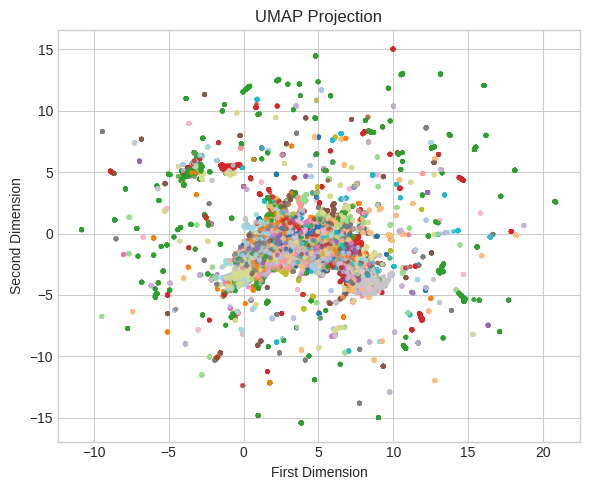

In [39]:
plt.figure(figsize=(6, 5))
plt.scatter(Z2[:, 0], Z2[:, 1], c=labels_kmedoids_before, s=6, cmap='tab20', alpha=0.7)
plt.title(f'UMAP Projection')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.tight_layout()
plt.savefig(f"umap_vgae_{n_clusters}.png")

In [40]:
index_of_medoids = kmedoids_before.medoid_indices_

In [41]:
index_of_medoids

array([ 9408, 44618, 38142, 19508, 35869, 38001, 29780, 15034,  3335,
       14956, 31567,  6887, 38333, 41270, 42617, 14555,  5673, 21985,
       19377, 16455, 31318, 32630, 48440, 42353, 13671, 41028, 15465,
       40413, 25863,  7787, 35915, 16103,  7992, 44984, 47018, 23559,
       26805,  1096, 13189,   787,   999, 48657,  2000,  5590, 15913,
       12270, 40940,  6407, 46881, 41599, 40928, 35691,  9982,  8758,
       19981, 12134, 10202, 45483,  1890, 37321, 29232,  4680, 14315,
       29768,  6570, 11403, 11128, 15327, 31962, 39063, 41918, 40483,
       37470, 30782, 44963, 38331, 22478, 37335, 21212, 12728, 14461,
        1279, 32503,  2128,  7445, 32728, 13307, 44388, 48265, 12306,
       34890, 42045, 31835, 22234, 14863, 20631,  7821, 31595,  6949,
        4446])

In [42]:
original_indices = {str(i): correspondence[str(i)] for i in index_of_medoids}

In [43]:
original_indices

{'9408': 9551,
 '44618': 45421,
 '38142': 38843,
 '19508': 19791,
 '35869': 36511,
 '38001': 38699,
 '29780': 30260,
 '15034': 15270,
 '3335': 3379,
 '14956': 15192,
 '31567': 32091,
 '6887': 6987,
 '38333': 39041,
 '41270': 42023,
 '42617': 43390,
 '14555': 14786,
 '5673': 5749,
 '21985': 22314,
 '19377': 19659,
 '16455': 16707,
 '31318': 31836,
 '32630': 33184,
 '48440': 49306,
 '42353': 43124,
 '13671': 13889,
 '41028': 41776,
 '15465': 15706,
 '40413': 41151,
 '25863': 26266,
 '7787': 7905,
 '35915': 36558,
 '16103': 16351,
 '7992': 8110,
 '44984': 45794,
 '47018': 47856,
 '23559': 23917,
 '26805': 27219,
 '1096': 1119,
 '13189': 13400,
 '787': 804,
 '999': 1020,
 '48657': 49525,
 '2000': 2030,
 '5590': 5664,
 '15913': 16159,
 '12270': 12463,
 '40940': 41686,
 '6407': 6496,
 '46881': 47717,
 '41599': 42358,
 '40928': 41674,
 '35691': 36329,
 '9982': 10136,
 '8758': 8889,
 '19981': 20272,
 '12134': 12325,
 '10202': 10362,
 '45483': 46300,
 '1890': 1919,
 '37321': 38007,
 '29232': 29

In [44]:
with open(f"./medoids_kmedoids_gae_{n_clusters}.json", "w") as f:
    json.dump(original_indices, f, indent=2)